In [ ]:
# !cp -r dataset/training/training dataset
# !rm -rf dataset/training/training

In [3]:
!unzip training.zip -d dataset
# !rm -rf dataset/training.zip

Archive:  training.zip
   creating: dataset/training/0/   
 extracting: dataset/training/0/1.png  
 extracting: dataset/training/0/10.png  
 extracting: dataset/training/0/100.png  
 extracting: dataset/training/0/1000.png  
 extracting: dataset/training/0/1001.png  
 extracting: dataset/training/0/1002.png  
 extracting: dataset/training/0/1003.png  
  inflating: dataset/training/0/1004.png  
 extracting: dataset/training/0/1005.png  
 extracting: dataset/training/0/1006.png  
 extracting: dataset/training/0/1007.png  
 extracting: dataset/training/0/1008.png  
 extracting: dataset/training/0/1009.png  
 extracting: dataset/training/0/101.png  
 extracting: dataset/training/0/1010.png  
 extracting: dataset/training/0/1011.png  
 extracting: dataset/training/0/1012.png  
 extracting: dataset/training/0/1013.png  
 extracting: dataset/training/0/1014.png  
 extracting: dataset/training/0/1015.png  
 extracting: dataset/training/0/1016.png  
  inflating: dataset/training/0/1017.png  
 e

In [4]:
!du -mh dataset/training

'du' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!ls dataset/training

'ls' is not recognized as an internal or external command,
operable program or batch file.


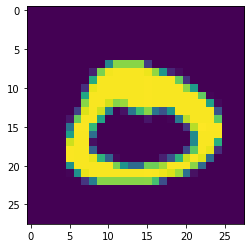

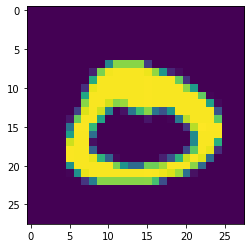

In [6]:
# helper function 1 - display image from path
import PIL
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from multipledispatch import dispatch

@dispatch(str)
def display_img(path):
  im = Image.open(path)
  plt.imshow( im )
  plt.show()

# @dispatch(PIL.PngImagePlugin.PngImageFile)
# def display_img(pil_img):
#   plt.imshow( pil_img )
#   plt.show()

@dispatch(PIL.Image.Image)
def display_img(pil_img):
  plt.imshow( pil_img )
  plt.show()

@dispatch(np.ndarray)
def display_img(np_img):
  display_img(convert_np_PIL(np_img))

# helper function 2: convert np array to PIL image
def convert_PIL_np(pil_img):
  return np.array(pil_img)

# helper function 3: convert PIL image to np array
def convert_np_PIL(np_img):
  # rescale values from [0, 255] using np.floor
  max_val = max(np_img.ravel())
  min_val = min(np_img.ravel())
  rescaled_img = ( np_img.astype(float) - min_val ) / ( max_val - min_val )
  # apply colormap directly to normalised array
  return Image.fromarray(np.uint8(cm.viridis(rescaled_img)*255))
  

display_img(Image.open('dataset/training/0/' + os.listdir('dataset/training/0/')[1]))
display_img(convert_np_PIL(np.array(Image.open('dataset/training/0/' + os.listdir('dataset/training/0/')[1]))))

# imports 

In [7]:
import torch
import torchvision
from torchvision import transforms
from tqdm import tqdm

from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
device = 'cuda' if torch.cuda.is_available() else 'cpu'

c:\Users\shriv\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# rest of stuff


In [8]:
# setting up imagefolder transform and batch size, input sizes

batch_size = 256
img_dims = 32
tfms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize([img_dims, img_dims]),
    transforms.ToTensor(),
])

# rest of setup
imfolder = ImageFolder('dataset/training/', tfms)
train_set, test_set = torch.utils.data.random_split(imfolder, [55000, 5000])

train_loader = DataLoader(train_set, batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size, shuffle=True)

### model class

In [9]:
from torch import nn
class ICRclassifier(nn.Module):
    
    def __init__(self, num_classes=10):
        super(ICRclassifier, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Linear(1*1*128, 1024),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Linear(1024, 1024),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(1024, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

### other stuff after model class

In [10]:
# helper function: accuracy of model on a loader
def accuracy_calc(model, loader):
  correct = 0
  total = 0
  batch_sizes = []

  model = model.to(device)
  with torch.no_grad():
    for image, label in tqdm(loader):
      image, label = image.to(device), label.to(device)
      score = model(image)
      pred = score.argmax(dim=1)

      correct += ( pred == label ).sum().item()
      total += len(pred)
  
  print(total, correct)
  print(100 * correct / total)

In [12]:
model = ICRclassifier()
model.load_state_dict(torch.load('model_state_dict.pt', map_location=torch.device('cpu')), strict=False, )
model = model.to(device)

losses = []

In [13]:

from tqdm import tqdm
def training_loop(learning_rate, n_epochs):
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  criterion = torch.nn.CrossEntropyLoss()
  for epoch in range(n_epochs):
    print('epoch #', epoch)
    for images, labels in tqdm(train_loader):
      images, labels = images.to(device), labels.to(device)
      scores = model(images)
      preds = scores.argmax(dim=1)

      loss = criterion(scores, labels)
      optimizer.zero_grad()
      loss.backward()
      losses.append(loss.item())
      optimizer.step()
      
      images, labels, preds = images.to('cpu'), labels.to('cpu'), preds.to('cpu')


In [42]:
training_loop(3e-4, 10)
training_loop(3e-6, 10)
training_loop(3e-8, 10)

epoch # 0


100%|██████████| 215/215 [00:24<00:00,  8.78it/s]


epoch # 1


100%|██████████| 215/215 [00:24<00:00,  8.88it/s]


epoch # 2


100%|██████████| 215/215 [00:24<00:00,  8.93it/s]


epoch # 3


100%|██████████| 215/215 [00:24<00:00,  8.79it/s]


epoch # 4


100%|██████████| 215/215 [00:23<00:00,  8.98it/s]


epoch # 5


100%|██████████| 215/215 [00:24<00:00,  8.63it/s]


epoch # 6


100%|██████████| 215/215 [00:23<00:00,  9.00it/s]


epoch # 7


100%|██████████| 215/215 [00:24<00:00,  8.83it/s]


epoch # 8


100%|██████████| 215/215 [00:24<00:00,  8.90it/s]


epoch # 9


100%|██████████| 215/215 [00:24<00:00,  8.92it/s]


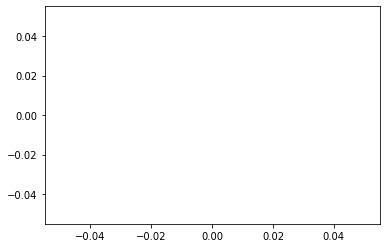

In [14]:
plt.plot(losses)
plt.show()

In [ ]:
# foldername   predicted    prediction

In [19]:
accuracy_calc(model, test_loader)


100%|██████████| 20/20 [00:48<00:00,  2.44s/it]

5000 4995
99.9


In [49]:
accuracy_calc(model, train_loader)

100%|██████████| 215/215 [00:16<00:00, 13.27it/s]

55000 54986
99.97454545454545


In [18]:
####################################################################
######################### SAVE THE MODEL ###########################
####################################################################

# Specify a path
PATH = "model_state_dict.pt"

# # Save
# drive.mount('/content/drive')
# torch.save(model.state_dict(), PATH)
# drive.flush_and_unmount()

# Load
model = ICRclassifier()
model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))
model = model.to(device)

0.99215686 0.0
(32, 32)


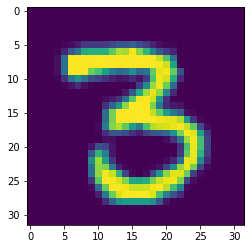

[0.16541843 0.19853711 0.06749502 0.10810388 0.04854663 0.05829236
 0.13811375 0.09282544 0.06438606 0.05828129] tensor([1], device='cuda:0') 3
1.0 0.0
(32, 32)


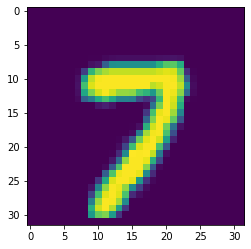

[0.20417996 0.10997947 0.07312222 0.0750381  0.08430212 0.05317784
 0.11565639 0.1223427  0.07682634 0.08537493] tensor([0], device='cuda:0') 7
0.99607843 0.0
(32, 32)


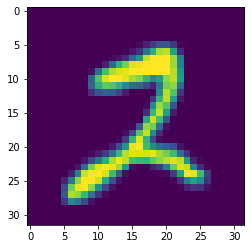

[0.24589086 0.15687338 0.09300574 0.07839491 0.04914204 0.03652041
 0.11623618 0.09706245 0.06866589 0.05820821] tensor([0], device='cuda:0') 2
0.99607843 0.0
(32, 32)


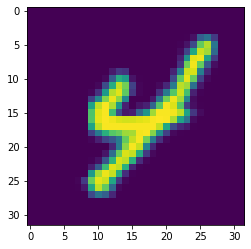

[0.17941491 0.14681406 0.06680164 0.05270752 0.12647432 0.05876251
 0.13924032 0.07433302 0.07658441 0.07886726] tensor([0], device='cuda:0') 4
0.99607843 0.0
(32, 32)


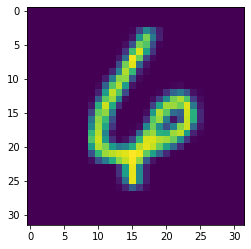

[0.29655132 0.10839974 0.03763824 0.05926662 0.06010449 0.0610911
 0.22835223 0.03083054 0.06329291 0.05447276] tensor([0], device='cuda:0') 6
0.99607843 0.0
(32, 32)


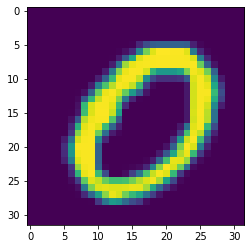

[0.37471056 0.09681989 0.0492066  0.05857915 0.04630726 0.04544288
 0.14104602 0.06055815 0.06303596 0.06429347] tensor([0], device='cuda:0') 0
1.0 0.0
(32, 32)


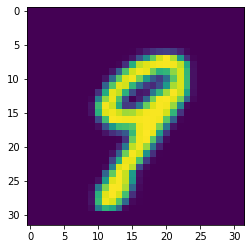

[0.31645286 0.07515354 0.06300801 0.03724995 0.11125685 0.03665076
 0.12831692 0.08309705 0.05649362 0.09232055] tensor([0], device='cuda:0') 9
0.98039216 0.0
(32, 32)


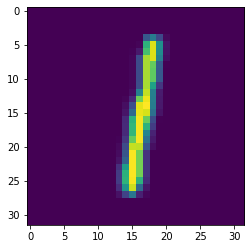

[0.18827736 0.21136741 0.08081775 0.08372663 0.04227198 0.04422931
 0.12723048 0.08695698 0.08320921 0.0519128 ] tensor([1], device='cuda:0') 1
1.0 0.0
(32, 32)


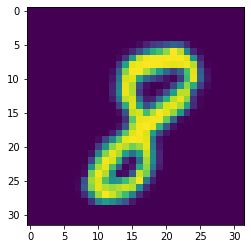

[0.24853143 0.17391261 0.07599836 0.05958021 0.05473399 0.03853323
 0.14549486 0.05835048 0.08832576 0.05653913] tensor([0], device='cuda:0') 8
0.99607843 0.0
(32, 32)


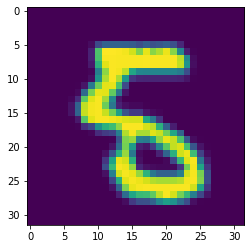

[0.20436707 0.13846178 0.03877467 0.0782391  0.05663424 0.08923151
 0.19150609 0.0525928  0.08461346 0.06557928] tensor([0], device='cuda:0') 5


In [29]:
root_dir = '/content/dataset/training/'
output_dir = '/content/dataset/output/'
os.system(f'mkdir {output_dir}')
softmax = torch.nn.Softmax(dim=1)

for class_name in os.listdir(root_dir):
  class_dir = root_dir + class_name + '/'
  class_output_dir = output_dir + class_name + '/'
  # print(class_output_dir)
  os.system(f'mkdir {class_output_dir}')
  for image_name in os.listdir(class_dir):
    image_path = class_dir + image_name

    # read image and transform it
    image = tfms(Image.open(image_path)).unsqueeze(0).to(device)
    image_cpu = image.to('cpu').reshape([32, 32]).numpy()
    print(max(image_cpu.flatten()), min(image_cpu.flatten()))
    print(image_cpu.shape)

    display_img(Image.fromarray((image_cpu * 255).astype(np.uint8)))
    label = int(class_name)
    score = model(image)
    pred = score.argmax(dim=1)
    prob = softmax(score)
    print(prob.cpu().detach().numpy().flatten(), pred, label)

    
    
    


    break

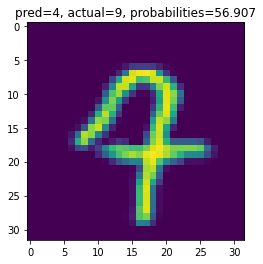

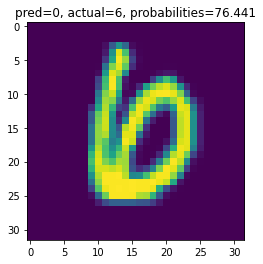

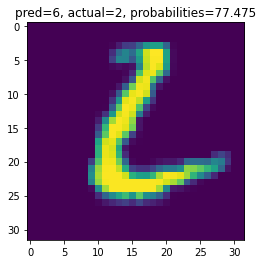

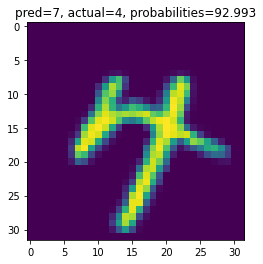

In [51]:
def display_imgs_wrong(images, labels, preds, probs):
  # images, labels, preds, probs = images[:10], labels[:10], preds[:10], probs[:10]
  images = images.reshape([-1, 32, 32])
  num_imgs = len(images)
  num_rows = 1 + ( num_imgs // 10)
  num_cols = 10
  
  
  # plt the images in subplots
  for i, (image, label, pred, prob) in enumerate(list(zip(images, labels, preds, probs))):
    if pred == label:
      continue      
    # print(pred, label)
    x = i // 10
    y = i % 10

    # axs[x][y].imshow(convert_np_PIL(image.numpy()))
    # axs[x][y].set_title(f'pred={pred}, actual={label}, probabilities={prob[pred] * 100 :.3f}')
    plt.imshow(convert_np_PIL(image.numpy()))
    plt.title(f'pred={pred}, actual={label}, probabilities={prob[pred] * 100 :.3f}')
    plt.show()

def display_imgs(images, labels, preds, probs):
  # images, labels, preds, probs = images[:10], labels[:10], preds[:10], probs[:10]
  images = images.reshape([-1, 32, 32])
  num_imgs = len(images)
  num_rows = 1 + ( num_imgs // 10)
  num_cols = 10
  
  fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_rows * 4, num_cols * 4))
  
  # plt the images in subplots
  for i, (image, label, pred, prob) in enumerate(list(zip(images, labels, preds, probs))):
    x = i // 10
    y = i % 10

    axs[x][y].imshow(convert_np_PIL(image.numpy()))
    axs[x][y].set_title(f'pred={pred}, actual={label}, probabilities={prob[pred] * 100 :.3f}')
  
  fig.show()


for images, labels in test_loader:
  softmax = torch.nn.Softmax(dim=1)
  images, labels = images.to(device), labels.to(device)
  model = model.to(device)

  scores = model(images)
  preds = scores.argmax(dim=1)
  probs = softmax(scores)
  # display_imgs(images.cpu(), labels.cpu(), preds.cpu(), probs.cpu())
  display_imgs_wrong(images.cpu(), labels.cpu(), preds.cpu(), probs.cpu())

  # break
